In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

In [2]:
import sklearn.datasets as datasets

In [3]:
from sklearn.metrics import roc_curve,auc

In [4]:
from sklearn.model_selection import KFold,StratifiedKFold

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
iris = datasets.load_iris()

X = iris['data']

y = iris['target']

In [8]:
y!=2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
cond = y!=2

X = X[cond]

y = y[cond]

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# a是数据
a = np.random.randint(50,size = (8,2))
# b是目标值
b = np.array([0,0,1,0,1,1,1,0])
display(a,b)

array([[ 8,  6],
       [41, 48],
       [48, 43],
       [25,  6],
       [ 3, 49],
       [33, 14],
       [42, 10],
       [43,  7]])

array([0, 0, 1, 0, 1, 1, 1, 0])

In [12]:
kFold = KFold(n_splits=4)
kFold

KFold(n_splits=4, random_state=None, shuffle=False)

In [13]:
for train,test in kFold.split(a,b):
    print(train,test)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [15]:
sKFold = StratifiedKFold(n_splits=4)

for train,test in sKFold.split(a,b):
    print(train,test)

[1 3 4 5 6 7] [0 2]
[0 2 3 5 6 7] [1 4]
[0 1 2 4 6 7] [3 5]
[0 1 2 3 4 5] [6 7]


In [16]:
#鸢尾花資料進行分類

sKFold = StratifiedKFold(6)

In [17]:
import warnings
warnings.filterwarnings('ignore')


In [18]:
lg = LogisticRegression()

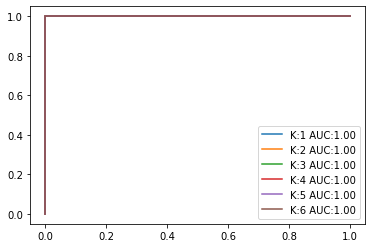

In [19]:

num = 1
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    lg.fit(X_train,y_train)
    
    prob = lg.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    auc_ = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    
plt.legend()

In [20]:
svc = SVC(probability=True)

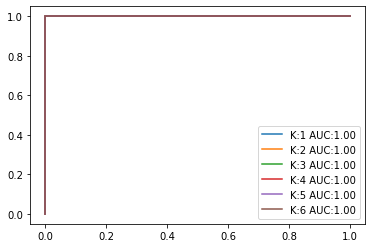

In [21]:
num = 1
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    svc.fit(X_train,y_train)
    
    prob = svc.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    auc_ = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    
plt.legend()

In [22]:
X.shape

(100, 4)

In [23]:
X = np.concatenate([X,np.random.randn(100,800)],axis = 1)
X.shape

(100, 804)

In [24]:
X


array([[ 5.1       ,  3.5       ,  1.4       , ..., -0.81402493,
        -0.57151408, -0.619106  ],
       [ 4.9       ,  3.        ,  1.4       , ...,  0.36074474,
         0.72696491, -1.25166712],
       [ 4.7       ,  3.2       ,  1.3       , ..., -0.90183141,
        -0.80033999,  0.17723578],
       ...,
       [ 6.2       ,  2.9       ,  4.3       , ..., -0.61997408,
        -1.13713756, -0.3116283 ],
       [ 5.1       ,  2.5       ,  3.        , ..., -0.41468409,
         1.01064859,  0.35431606],
       [ 5.7       ,  2.8       ,  4.1       , ..., -1.30387398,
        -0.97112358, -0.94537277]])

SVC 平均的auc：0.95


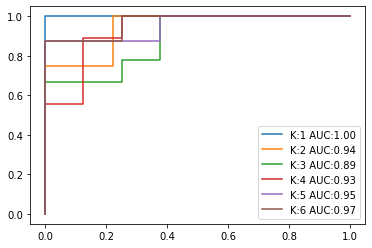

In [29]:
lg = LogisticRegression()
num = 1
aucs = []
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    lg.fit(X_train,y_train)
    
    prob = lg.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    
    
print('SVC 平均的auc：%0.2f'%(np.mean(aucs)))    
plt.legend()

SVC 平均的auc：0.93


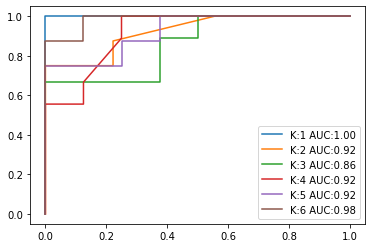

In [31]:
svc=SVC(probability=True)
num = 1
aucs = []
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    svc.fit(X_train,y_train)
    
    prob = svc.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1

print('SVC 平均的auc：%0.2f'%(np.mean(aucs))) 
plt.legend()

In [34]:
# 线性插值 才能求平均值
from scipy import interp

平均的auc：0.95


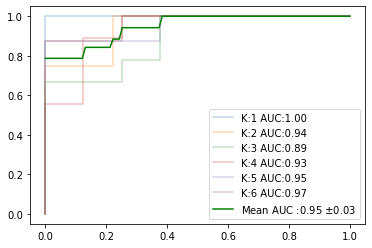

In [50]:
lg = LogisticRegression()
num = 1
aucs = []
fprs = np.linspace(0,1,100)

tprs = []
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    lg.fit(X_train,y_train)
    
    prob = lg.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    
    tprs.append(interp(fprs,fpr,tpr))
    
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,alpha = 0.3,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    

# tprs中6个数据，求平均值
tprs = np.mean(tprs,axis = 0)

# 平均的tprs，和fprs，求解平均的auc值
auc_mean = auc(fprs,tprs)
std = np.std(aucs)
plt.plot(fprs,tprs,label = 'Mean AUC :%0.2f $\pm$%0.2f'%(auc_mean,std),color = 'green')
print('平均的auc：%0.2f'%(np.mean(aucs)))
plt.legend()

SVC 平均的auc：0.80


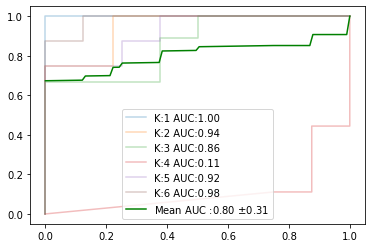

In [53]:
svc = SVC(probability=True)
num = 1
aucs = []

fprs = np.linspace(0,1,100)

tprs = []

for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    svc.fit(X_train,y_train)
    
    prob = svc.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    
    tprs.append(interp(fprs,fpr,tpr))
    
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_),alpha = 0.3)
    num +=1
    
tprs = np.mean(tprs,axis = 0)

auc_mean = auc(fprs,tprs)

std = np.std(aucs)

plt.plot(fprs,tprs,label = 'Mean AUC :%0.2f $\pm$%0.2f'%(auc_mean,std),color = 'green')

print('SVC 平均的auc：%0.2f'%(np.mean(aucs)))   
plt.legend()